# Setup

In [40]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import BaggingClassifier


# Imports

In [2]:
dataset = pd.read_csv('data.csv')

features = dataset.columns[2:]

dataset.head()

,Unnamed: 0,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
0,0,0,-0.252202,-2.566050,-0.023861,-1.327195,-0.442692,0.232170,-0.306867,0.306037,...,-3.505362,1.166824,0.239583,-1.097354,3.918826,3.995630,-6.160450,-0.741557,0.222054,-0.545195
1,1,2,-0.017224,0.848674,-0.064528,-0.559169,0.495683,-0.221037,0.600275,0.097370,...,-4.529210,-0.601187,-0.265240,0.412635,-1.515629,-0.792231,-0.049693,-0.124129,-0.299217,-1.959058
2,2,0,-0.146497,-2.523801,0.055622,0.009029,-0.358915,3.379764,0.328161,0.058665,...,-7.563246,0.952214,0.294814,1.244459,5.352310,0.230819,-0.597130,-0.290412,-0.214719,2.293746
3,3,0,-0.415312,-3.435183,-0.179030,0.495687,-0.012186,0.743955,-0.512042,0.657256,...,-0.701407,0.493542,0.983458,-1.557384,4.124575,2.572391,-4.345241,-0.208466,-0.056913,1.034822
4,4,4,0.030422,-0.910378,-0.127546,0.242883,-0.075683,-1.332427,-0.002693,0.293016,...,4.645319,1.941520,-0.388501,-0.070920,2.535466,-5.792916,0.599543,0.179971,0.602240,-1.164397


In [3]:
print(features)

Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10',
       'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15',
       'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20',
       'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25',
       'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30'],
      dtype='object')


# EDA

In [4]:
dataset.describe()

,Unnamed: 0,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,2.049000,-0.020997,0.288023,-0.005130,0.091127,0.117804,0.333761,-0.108235,0.080892,...,-0.405886,0.110297,-0.016029,-0.063825,-0.392094,0.355144,0.331634,0.078923,0.054881,0.110886
std,288.819436,1.432708,0.163260,1.818466,0.096512,0.618472,1.016934,1.954494,0.898582,0.564528,...,4.663430,1.098582,0.798825,1.308091,4.644741,2.468748,3.941760,0.620317,0.366450,1.919232
min,0.000000,0.000000,-0.778810,-5.301694,-0.332824,-2.327548,-3.285532,-5.513964,-2.934413,-1.737896,...,-14.003390,-2.987305,-2.517772,-4.478037,-16.605529,-8.199870,-11.298643,-1.792300,-1.208500,-7.184382
25%,249.750000,1.000000,-0.123831,-0.965050,-0.069861,-0.303988,-0.559319,-0.987174,-0.712195,-0.304757,...,-3.547057,-0.628440,-0.574813,-0.929281,-3.367948,-1.313965,-2.519666,-0.336281,-0.182774,-1.112967
50%,499.500000,2.000000,-0.014318,0.349209,-0.007024,0.075019,0.127796,0.317049,-0.090718,0.075996,...,-0.392700,0.100070,-0.040650,0.002610,-0.348276,0.364736,0.377991,0.076805,0.052795,0.150267
75%,749.250000,3.000000,0.086369,1.561049,0.061827,0.490530,0.823503,1.651842,0.509614,0.486690,...,2.463641,0.857893,0.513138,0.777291,3.131505,2.010961,2.794329,0.463201,0.277617,1.362753
max,999.000000,4.000000,0.564083,5.692994,0.301225,2.281205,3.217715,6.315831,2.599079,1.728367,...,15.964340,3.543951,2.362740,3.926793,12.332701,9.687675,12.808660,2.345540,1.200478,5.906229


We check for duplicated columns. There are none.

In [5]:
dataset_without_duplicates = dataset.drop_duplicates(subset=features, keep='first')

print('Number of duplicates: ', dataset.shape[1] - dataset_without_duplicates.shape[1])

Number of duplicates:  0


We look at the distributions of the features to see if there are any imbalances or outliers. 

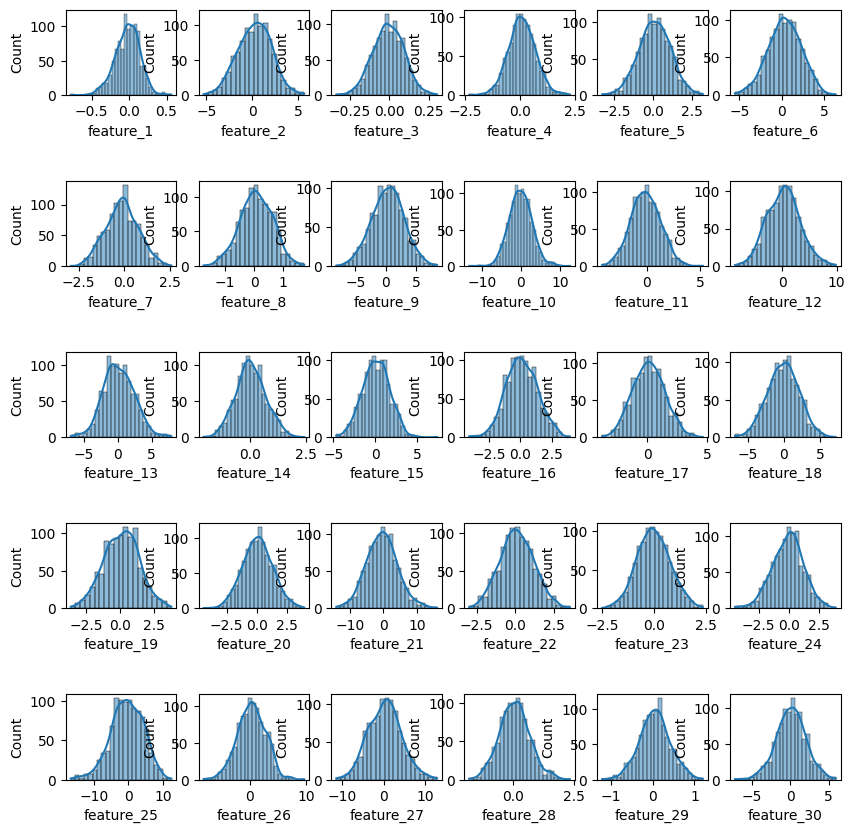

In [6]:
ncols = 6
nrows = 5
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10), )
for i in range(nrows):
    for j in range(ncols):
        sns.histplot(data = dataset.loc[:, features[ncols * i + j]], kde=True, ax = ax[i, j])
plt.subplots_adjust(hspace=1.0)  
plt.show()

Visually, we can see that the distributions for each of 30 features are normally distributed. However, they have different scales. 

Now we look at the distributions of the labels to see if they are uniformly distributed.

<Axes: xlabel='label', ylabel='Count'>

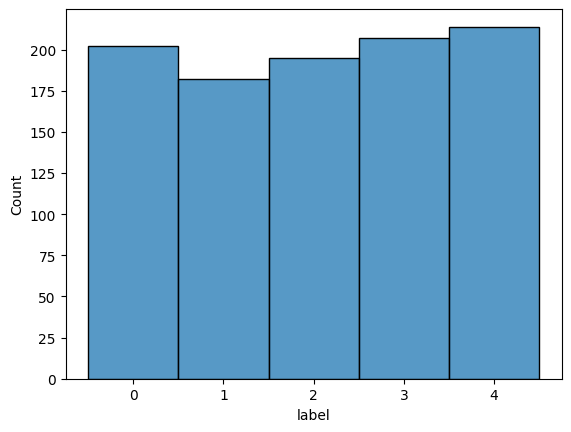

In [7]:
sns.histplot(data = dataset.iloc[:, 1], discrete = True)

Indeed, the labels are uniform. No need to stratify the data.

I look at the correlation matrix of our features to see if there are any features that are highly correlated. I also included the correlation between labels and features. 

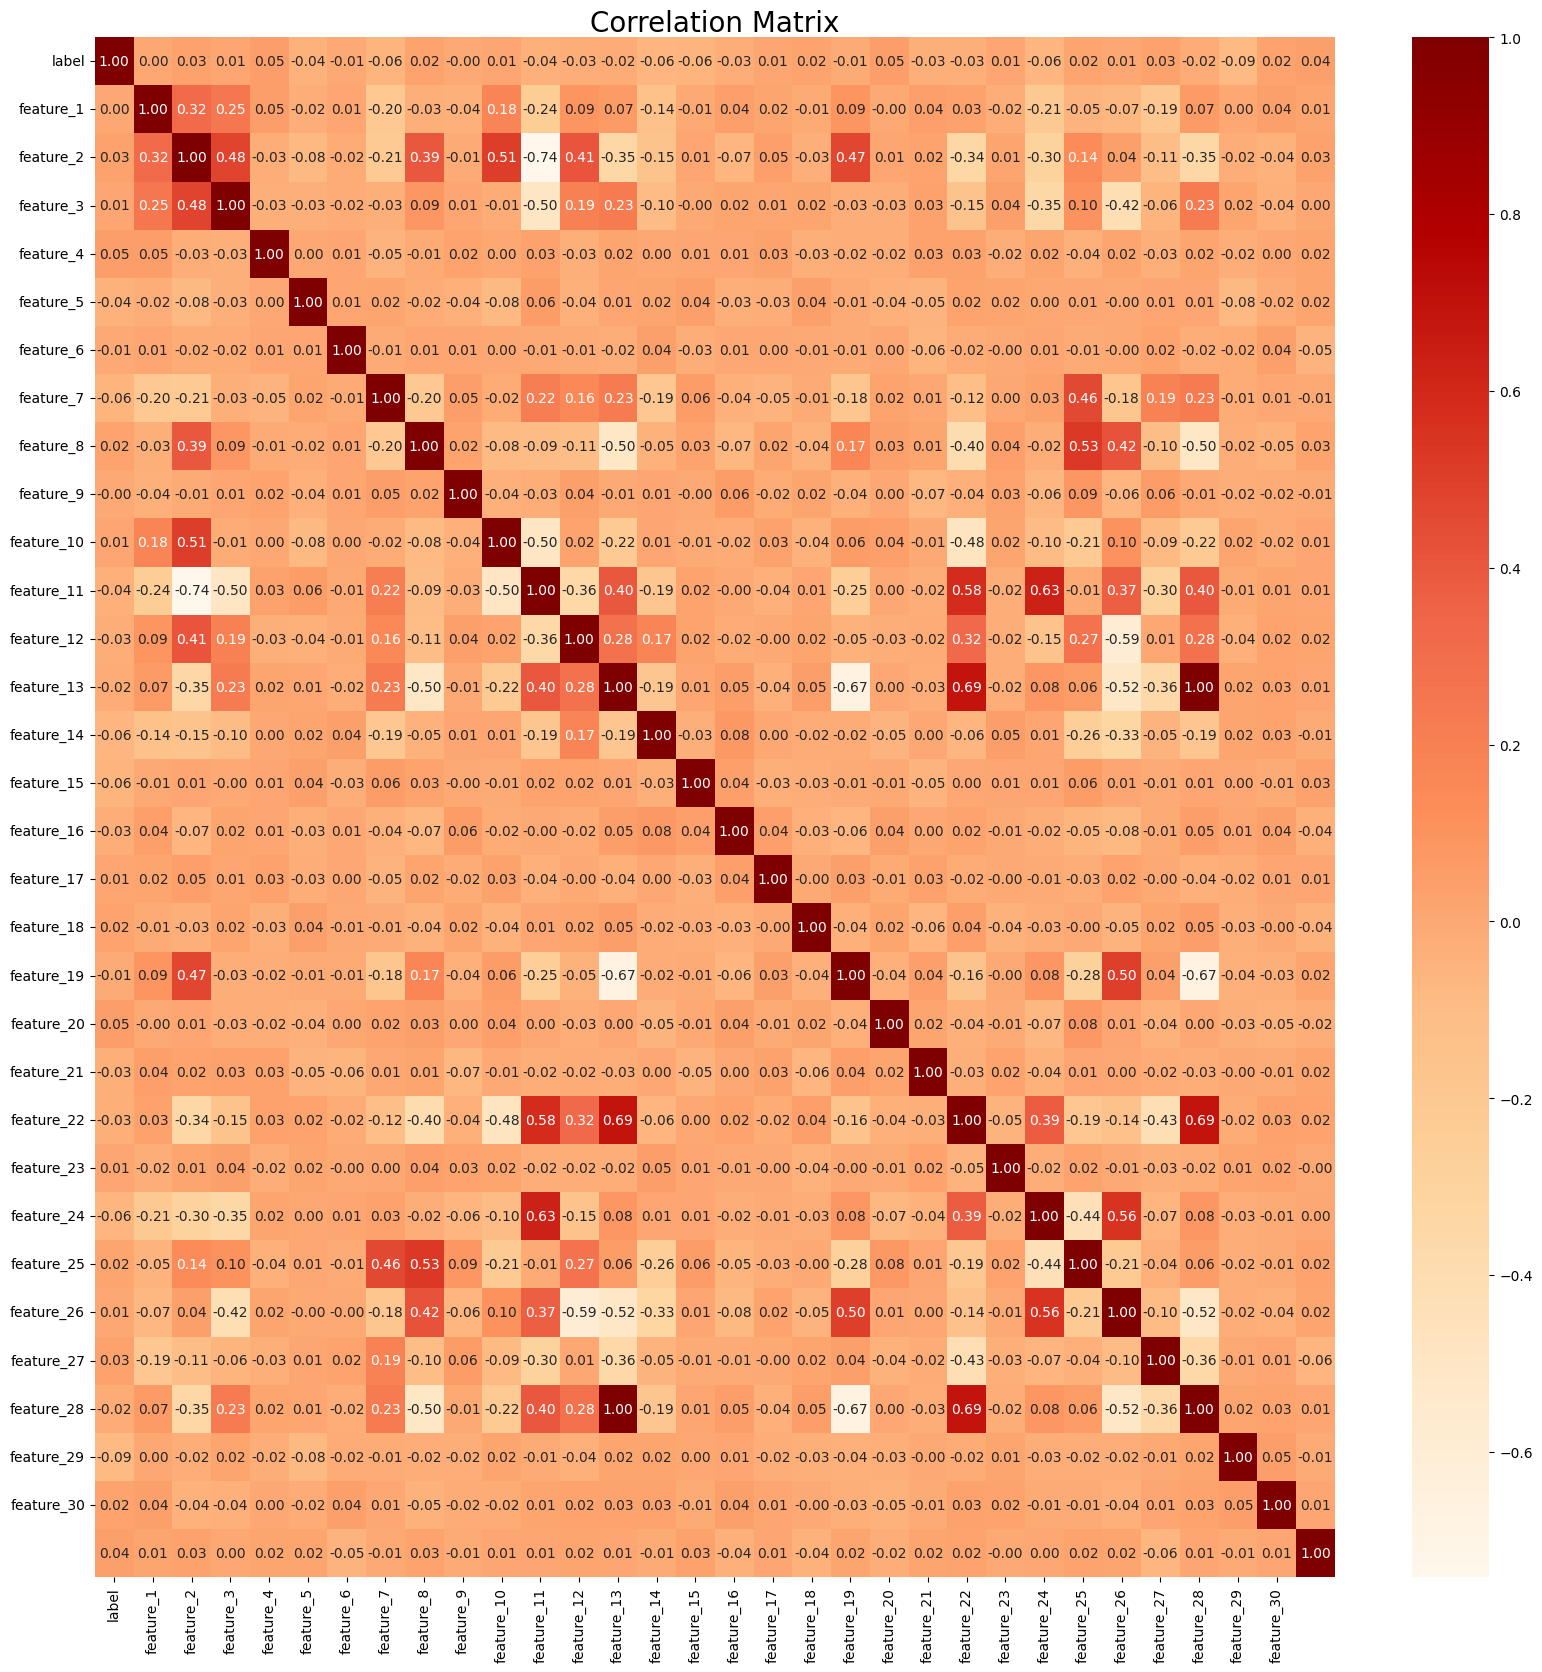

In [8]:
# plotting the correlation matrix between features 

corr_matrix = np.asarray(dataset[1:].corr())

plt.figure(figsize=(20, 20))
plt.title('Correlation Matrix', pad = 0.6, fontsize=20)
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='OrRd', xticklabels=dataset.columns[1:], yticklabels=dataset.columns[1:])
plt.show()

We see that there are some features that are highly correlated. We will use PCA to reduce the dimensionality of our data.

In particular, <i>feature_12</i> and <i>feature_27</i> have a correlation coefficient of 1.0. We will drop one of these features.


In [9]:
# drop feature_27 from the dataset

dataset = dataset.drop(columns=['feature_27'])
features = dataset.columns[2:]

# Data Visualization

/Users/daniyarzakarin/Documents/code/uni/ml-individual-project/.venv/lib/python3.9/site-packages/sklearn/utils/_param_validation.py:558: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


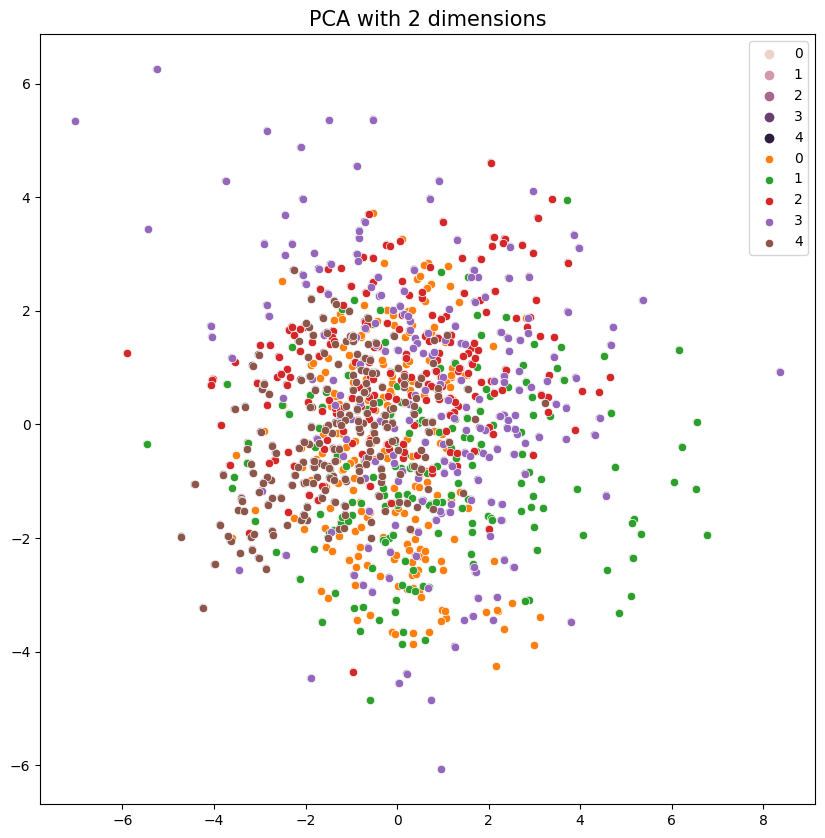

In [10]:

pipeline = Pipeline([
    ('scaler', StandardScaler(with_mean = 0, with_std = 1)),
    ('pca', PCA(n_components=2)),
])

plt.figure(figsize=(10, 10))

plt.title('PCA with 2 dimensions', fontsize = 15)

X = dataset[features]
y = dataset['label']

X = pipeline.fit_transform(X)

sns.scatterplot(x = X[:, 0], y = X[:, 1], hue=y, legend="brief", sizes=(1.0, 1.0, 1.0, 1.0, 1.0))

for label in np.unique(y):
    sns.scatterplot(x = X[y == label, 0], y = X[y == label, 1], label=label, legend="brief")
plt.show()

We see that visually, the data is not linearly separable.

We plot the data in 3D to see if it is linearly separable in 3D. It is not.

/Users/daniyarzakarin/Documents/code/uni/ml-individual-project/.venv/lib/python3.9/site-packages/sklearn/utils/_param_validation.py:558: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


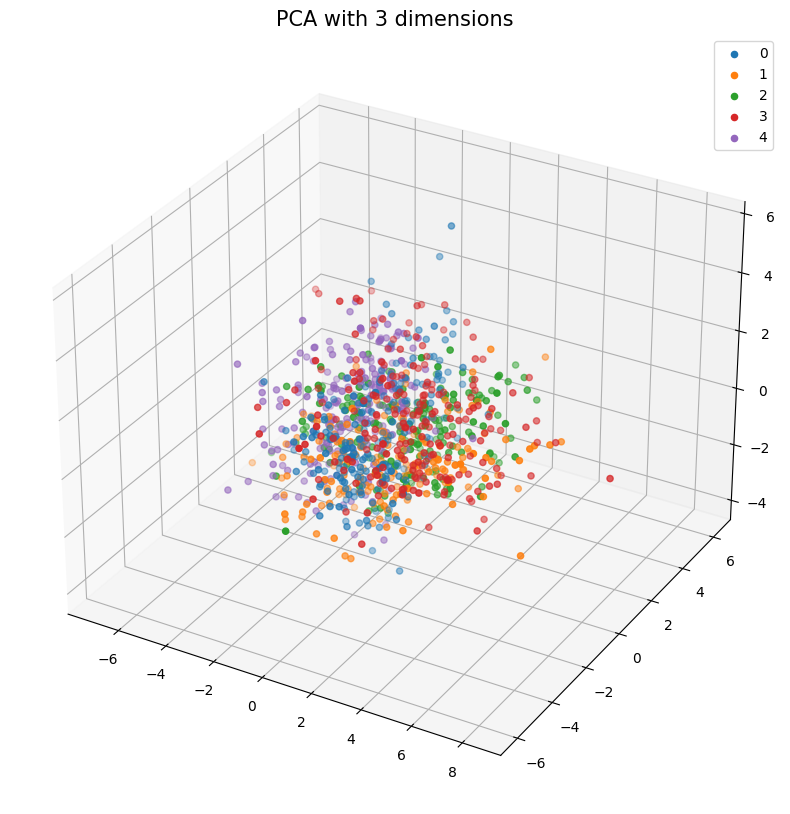

In [11]:
pipeline = Pipeline([
    ('scaler', StandardScaler(with_mean = 0, with_std = 1)),
    ('pca', PCA(n_components=3)),
])

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

X = dataset[features]
y = dataset['label']

X = pipeline.fit_transform(X)

for label in np.unique(y):
    ax.scatter(X[y == label, 0], X[y == label, 1], X[y == label, 2], label=label)
plt.legend()
plt.title('PCA with 3 dimensions', fontsize = 15)
plt.show()

We plot the explained variance ratio against the number of components in PCA. We see that the first 21 components explain 95% of the variance.

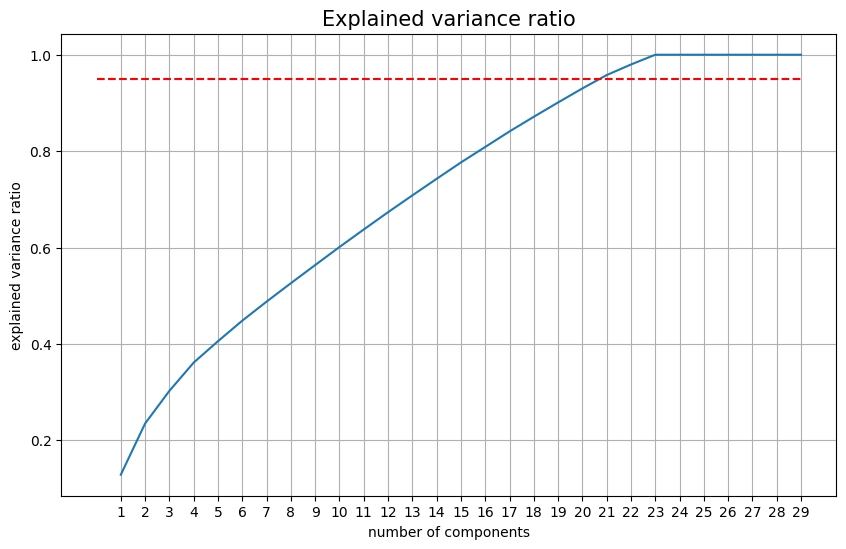

In [12]:
X_std = StandardScaler().fit_transform(dataset[features])
pca = PCA().fit(X_std)

exaplained_variance_ratio = pca.explained_variance_ratio_
plt.figure(figsize=(10, 6))

df = pd.DataFrame({'number of components' : np.arange(1, len(exaplained_variance_ratio) + 1), 'explained variance ratio' : np.cumsum(pca.explained_variance_ratio_)})
sns.lineplot(x = 'number of components', y = 'explained variance ratio', data = df)

plt.hlines(y = 0.95, xmin = 0, xmax = len(exaplained_variance_ratio), colors = 'red', linestyles = 'dashed')

plt.title('Explained variance ratio', fontsize = 15)
plt.grid(True)
plt.xticks(np.arange(1, len(exaplained_variance_ratio) + 1))
plt.show()

# Scaling, Train-Test Split, and Vanilla Models

In [13]:
# Rescaling the dataset such that the mean is 0 and the standard deviation is 1 for every feature
X_full = StandardScaler().fit_transform(dataset[features])
y_full = dataset['label']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

# Function that returns the report for the model on the holdout dataset
def check_accuracy(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print('Name:', model.__class__.__name__)
    print('Parameters:', model.get_params())
    print('Accuracy: ', classification_report(y_test, y_pred))

# Function that returns plots the confusion matrix for the model on the holdout dataset
def plot_confusion_matrix(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='.0f', cmap='OrRd', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title('Confusion Matrix', fontsize = 10)
    plt.xlabel('Predicted Label', fontsize = 10)
    plt.ylabel('True Label', fontsize = 10)
    plt.show()

KNN Classifier

Name: KNeighborsClassifier
Parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Accuracy:                precision    recall  f1-score   support

           0       0.47      0.60      0.53        42
           1       0.76      0.45      0.57        42
           2       0.45      0.51      0.48        37
           3       0.45      0.45      0.45        40
           4       0.68      0.69      0.68        39

    accuracy                           0.54       200
   macro avg       0.56      0.54      0.54       200
weighted avg       0.56      0.54      0.54       200



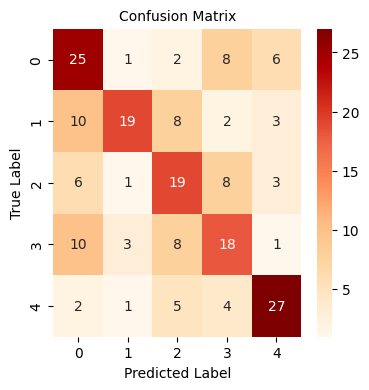

In [14]:
clf = KNeighborsClassifier()

clf.fit(X_train, y_train)

check_accuracy(clf, X_test, y_test)
plot_confusion_matrix(clf, X_test, y_test)

Vanilla Random Forest Classifier

Name: RandomForestClassifier
Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Accuracy:                precision    recall  f1-score   support

           0       0.61      0.74      0.67        42
           1       0.81      0.62      0.70        42
           2       0.67      0.70      0.68        37
           3       0.59      0.55      0.57        40
           4       0.71      0.74      0.72        39

    accuracy                           0.67       200
   macro avg       0.68      0.67      0.67       200
weighted avg       0.68      0.67      0.67       200



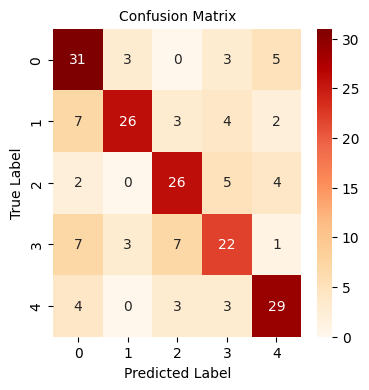

In [15]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

check_accuracy(clf, X_test, y_test)
plot_confusion_matrix(clf, X_test, y_test)

# Investigating KNN Hyperparameters

In this section, I have looked how changing some hyperparameters in the KNN model affect the accuracy "in vacuum"(i.e. without any other hyperparameters being changed). 

Let's first look how the <i>n_neighbors</i> hyperparameter affects the accuracy of the model. We plot the cross validation accuracy against the number of neighbors.

[0.05919459434779496, 0.04780167361086847, 0.06655073252789935, 0.039038442591886255, 0.07239475119095307, 0.057835974963685026, 0.06711184694225006, 0.0669029147347109, 0.06037383539249431, 0.04026164427839479, 0.046086874487211646, 0.03693237062523881, 0.04312771730569565, 0.050089919145472755, 0.03655133376499414, 0.045869379764718866, 0.04758150901348127, 0.03400000000000001, 0.04074309757492672, 0.03979949748426482, 0.040447496832313364, 0.038522720568516446, 0.03666060555964673, 0.03969886648255844, 0.053, 0.048672374094551836, 0.042426406871192875, 0.058343808583259285, 0.04512205669071391, 0.04172529209005013, 0.04405678154382138, 0.047423622805517505, 0.04276680956068621, 0.04588027898781785, 0.040987803063838375, 0.043600458713183285, 0.03969886648255844, 0.040112342240263166, 0.03852272056851645, 0.03436568055487918, 0.031874754901018446, 0.033, 0.03405877273185279, 0.04472135954999579, 0.04142463035441595, 0.035777087639996624, 0.035057096285916196, 0.039038442591886255, 0.

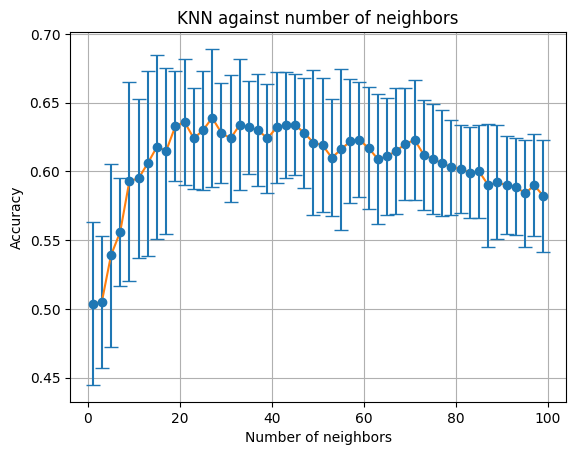

In [33]:
n_neighbors = np.arange(1, 100, 2)
cv_scores_mean = []
cv_scores_std = []

for k in n_neighbors:
    clf = KNeighborsClassifier(n_neighbors = k)
    cv_score = cross_val_score(clf, X_full, y_full, cv=10)
    cv_scores_mean.append(np.mean(cv_score))
    cv_scores_std.append(np.std(cv_score))

print(cv_scores_std)

plt.errorbar(n_neighbors, cv_scores_mean, yerr=cv_scores_std, fmt='o', capsize=5)
sns.lineplot(x = n_neighbors, y = cv_scores_mean)
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.grid(True)
plt.title('KNN against number of neighbors')
plt.show()


We see that the accuracy is highest when <i>n_neighbors</i> is in the range of 20-50. After than, the accuracy slowly decreases. We can also notice that the variance of the accuracy is pretty high. 

I plot the same graph for different distace metrics. 

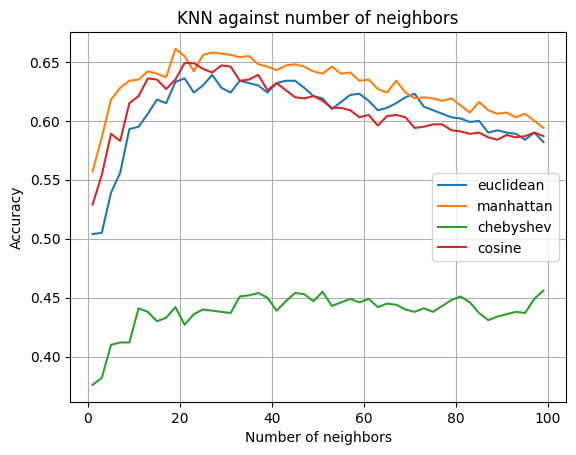

In [26]:
def knn_line_plot(metric):
    n_neighbors = np.arange(1, 100, 2)
    cv_scores_mean = []
    cv_scores_std = []

    for k in n_neighbors:
        clf = KNeighborsClassifier(n_neighbors = k, metric = metric)
        cv_score = cross_val_score(clf, X_full, y_full, cv=10)
        cv_scores_mean.append(np.mean(cv_score))
        cv_scores_std.append(np.std(cv_score))

    sns.lineplot(x = n_neighbors, y = cv_scores_mean, label = metric)

metrics = ['euclidean', 'manhattan', 'chebyshev', 'cosine']

for metric in metrics:
    knn_line_plot(metric)

plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.grid(True)
plt.title('KNN against number of neighbors')
plt.show()

Manhattan distance seems to perform the best. 

Earier we saw that the data features are highly correlated. We can use PCA to reduce the dimensionality of the data. Let's see how the number of components affects the accuracy of the model. 

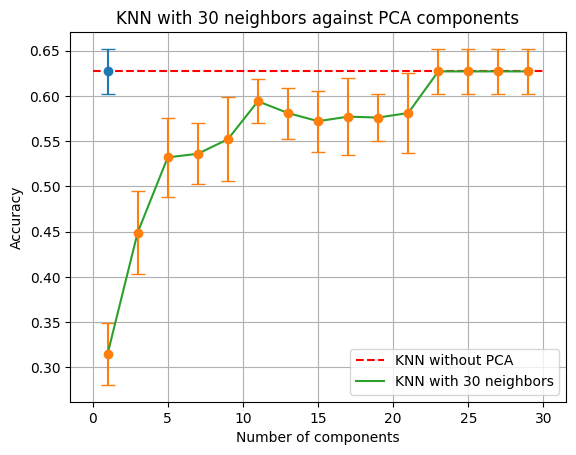

In [39]:
n_components = np.arange(1, 30, 2)
cv_scores_mean = []
cv_scores_std = []

for k in n_components:
    pca = PCA(n_components = k)
    X = pca.fit_transform(X_full)
    y = y_full

    clf = KNeighborsClassifier(n_neighbors = 30)

    cv_score = cross_val_score(clf, X, y, cv=5)
    cv_scores_mean.append(np.mean(cv_score))
    cv_scores_std.append(np.std(cv_score))

clf = KNeighborsClassifier(n_neighbors = 30)
knn_cv = cross_val_score(clf, X_full, y_full, cv=5)
plt.hlines(y = np.mean(knn_cv), xmin = 0, xmax = 30, colors = 'red', linestyles = 'dashed', label = 'KNN without PCA')
plt.errorbar([1], [np.mean(knn_cv)], yerr=[np.std(knn_cv)], fmt='o', capsize=5)

plt.errorbar(n_components, cv_scores_mean, yerr=cv_scores_std, fmt='o', capsize=5)
sns.lineplot(x = n_components, y = cv_scores_mean, label = 'KNN with 30 neighbors')

plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.grid(True)
plt.title('KNN with 30 neighbors against PCA components')
plt.legend()
plt.show()

We can see that PCA does not imrpove the accuracy of the KNN model. 

We now check if using an ensemble method like bagging improves the accuracy of the model. 

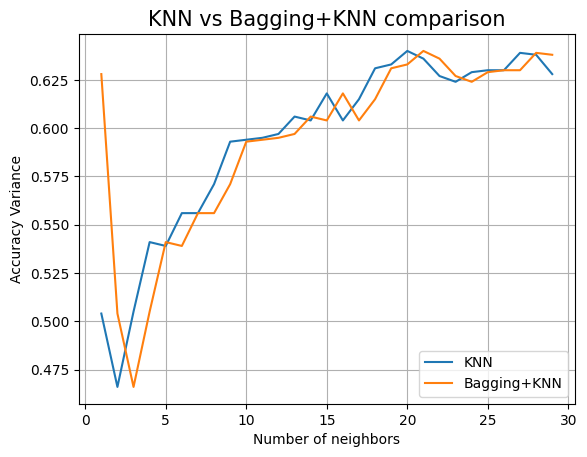

In [59]:
n_neighbors = np.arange(1, 30, 1)
bagging_cv_scores_mean = []
bagging_cv_scores_std = []
cv_scores_mean = []
cv_scores_std = []

for k in n_neighbors:
    bagging_clf = BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors = k), n_estimators = 100, max_samples = 0.5, max_features = 0.8)
    bagging_cv_score = cross_val_score(bagging_clf, X, y, cv=10)
    bagging_cv_scores_mean.append(np.mean(cv_score))
    bagging_cv_scores_std.append(np.std(cv_score))

    knn_clf = KNeighborsClassifier(n_neighbors = k)
    cv_score = cross_val_score(knn_clf, X, y, cv=10)
    cv_scores_mean.append(np.mean(cv_score))
    cv_scores_std.append(np.std(cv_score))

sns.lineplot(x = n_neighbors, y = cv_scores_mean, label = 'KNN')
sns.lineplot(x = n_neighbors, y = bagging_cv_scores_mean, label = 'Bagging+KNN')

plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy Variance')

plt.grid(True)
plt.title('KNN vs Bagging+KNN comparison', fontsize = 15)
plt.legend()
plt.show()


So bagging, only gives us a slight improvement on small number of neighbors. This is not surprising since choosing the high nubmer of neighbors gives the same ensembling effect. 

# Investigating Random Forest Hyperparameters

In this section, I have looked how changing some hyperparameters in the KNN model affect the accuracy "in vacuum"(i.e. without any other hyperparameters being changed). 

Let's first look how the <i>n_neighbors</i> hyperparameter affects the accuracy of the model. We plot the cross validation accuracy against the number of neighbors.

# Classification


In [63]:
# KNN with Bagging
from sklearn.ensemble import BaggingClassifier

pipe = Pipeline([('knn', KNeighborsClassifier(n_neighbors = 5))])
bagging = BaggingClassifier(estimator = pipe, n_estimators = 1000, max_samples = 0.5, max_features = 0.7)

bagging.fit(X_train, y_train)

print(f'Accuracy: {bagging.score(X_test, y_test)}')

Accuracy: 0.71


In [68]:
# KNN with PCA 

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=24)),
    ('knn', KNeighborsClassifier())
])

pipe.fit(X_train, y_train)

print(f'Accuracy: {pipe.score(X_test, y_test)}')

Accuracy: 0.535


In [90]:


pipe = Pipeline([('scaler', StandardScaler()), ('rfc', RandomForestClassifier(n_estimators = 100))])

pipe.fit(X_train, y_train)

print(f'Accuracy: {pipe.score(X_test, y_test)}')

Accuracy: 0.66


In [216]:
# Random Forest with PCA

pipe = Pipeline([('scaler', StandardScaler()), ('pca' , PCA(n_components=24)), ('rfc', RandomForestClassifier(n_estimators = 100))])

pipe.fit(X_train, y_train)

print(f'Accuracy: {pipe.score(X_test, y_test)}')

Accuracy: 0.64


In [91]:
print(X_train.shape)
print(X_test.shape)

(800, 30)
(200, 30)


In [240]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

def applyRFCwithHyperparameterTuning(data_train, labels_train, data_val, labels_val, title):
    param_grid = {
        'bootstrap': [True, False],
        'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90],
        'min_samples_leaf': [1, 2, 4],
        'min_samples_split': [2, 5, 10],
        'n_estimators': [160, 320, 640, 1000]
    }
    
    clf = RandomizedSearchCV(RandomForestClassifier(), param_grid, n_iter = 50, refit = True, verbose = 3)
    clf.fit(data_train, labels_train)

    print('Best params', clf.best_params_)
    print(f'Train data accuracy: {clf.best_score_}')
    print(f'Validation data accuracy: {clf.score(data_val, labels_val)}')

def applyKNNwithHyperparameterTuning(data_train, labels_train, data_val, labels_val, title):
    param_grid = {
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'chebyshev', 'cityblock', 'cosine'],
        'n_neighbors': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
    }
    
    clf = RandomizedSearchCV(KNeighborsClassifier(), param_grid, n_iter = 50, refit = True, verbose = 3)
    clf.fit(data_train, labels_train)

    print('Best params: ', clf.best_params_)
    print(f'Train data accuracy: {clf.best_score_}')
    print(f'Validation data accuracy: {clf.score(data_val, labels_val)}')


In [241]:
applyRFCwithHyperparameterTuning(X_train, y_train, X_test, y_test, 'Random Forest Classifier')

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=320;, score=0.706 total time=   0.5s
[CV 2/5] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=320;, score=0.650 total time=   0.5s
[CV 3/5] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=320;, score=0.613 total time=   0.5s
[CV 4/5] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=320;, score=0.669 total time=   0.5s
[CV 5/5] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=320;, score=0.681 total time=   0.5s
[CV 1/5] END bootstrap=True, max_depth=80, min_samples_leaf=4, min_samples_split=10, n_estimators=640;, score=0.700 total time=   0.8s
[CV 2/5] END bootstrap=True, max_depth=80, min_samples_leaf=4, min_samples_split=10, n_estimators=640;, score=0.662 total time=   0.8

In [239]:
applyKNNwithHyperparameterTuning(X_train, y_train, X_test, y_test, 'KNN')

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END metric=manhattan, n_neighbors=10, weights=uniform;, score=0.637 total time=   0.0s
[CV 2/5] END metric=manhattan, n_neighbors=10, weights=uniform;, score=0.725 total time=   0.0s
[CV 3/5] END metric=manhattan, n_neighbors=10, weights=uniform;, score=0.588 total time=   0.0s
[CV 4/5] END metric=manhattan, n_neighbors=10, weights=uniform;, score=0.600 total time=   0.0s
[CV 5/5] END metric=manhattan, n_neighbors=10, weights=uniform;, score=0.713 total time=   0.0s
[CV 1/5] END metric=manhattan, n_neighbors=45, weights=uniform;, score=0.644 total time=   0.0s
[CV 2/5] END metric=manhattan, n_neighbors=45, weights=uniform;, score=0.625 total time=   0.0s
[CV 3/5] END metric=manhattan, n_neighbors=45, weights=uniform;, score=0.531 total time=   0.0s
[CV 4/5] END metric=manhattan, n_neighbors=45, weights=uniform;, score=0.613 total time=   0.0s
[CV 5/5] END metric=manhattan, n_neighbors=45, weights=uniform;, score=0.5

In [244]:
import xgboost as xgb
clf = xgb.XGBClassifier()
clf.fit(X_train, y_train)

# predict the results
y_pred=clf.predict(X_test)

# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('XGB Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


XGB Model accuracy score: 0.7050
